In [1]:
# 나눔고딕 폰트 설치 및 설정
!apt-get update -qq
!apt-get install fonts-nanum -qq
!fc-cache -fv
!rm ~/.cache/matplotlib -rf

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/nanum: skipping, looped dire

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 폰트 설정
# font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
# fontprop = fm.FontProperties(fname=font_path, size=10)
# plt.rcParams['font.family'] = 'NanumGothic'
# plt.rcParams['axes.unicode_minus'] = False

font_path='/System/Library/Fonts/AppleGothic.ttf'
# fontprop = fm.FontProperties(fname=font_path, size=10)
plt.rcParams['font.family'] = 'AppleGothic'  # macOS
plt.rcParams['axes.unicode_minus'] = False

훈련셋 shape: (25000, 32, 32, 3)
테스트셋 shape: (5000, 32, 32, 3)


2025-07-23 17:32:52.828884: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3 Pro
2025-07-23 17:32:52.828906: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 18.00 GB
2025-07-23 17:32:52.828917: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 6.00 GB
2025-07-23 17:32:52.828930: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-07-23 17:32:52.828939: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
/Users/kwangsiklee/miniforge3/envs/llmenv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. W

Epoch 1/20


2025-07-23 17:32:54.374567: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


391/391 - 5s - 13ms/step - accuracy: 0.3321 - loss: 1.5500 - val_accuracy: 0.3504 - val_loss: 1.5332
Epoch 2/20
391/391 - 2s - 6ms/step - accuracy: 0.3665 - loss: 1.4900 - val_accuracy: 0.3278 - val_loss: 1.5444
Epoch 3/20
391/391 - 2s - 6ms/step - accuracy: 0.3572 - loss: 1.5320 - val_accuracy: 0.3604 - val_loss: 1.4847
Epoch 4/20
391/391 - 2s - 6ms/step - accuracy: 0.3545 - loss: 1.5946 - val_accuracy: 0.3366 - val_loss: 1.9328
Epoch 5/20
391/391 - 2s - 6ms/step - accuracy: 0.3419 - loss: 1.7301 - val_accuracy: 0.3242 - val_loss: 1.5829
Epoch 6/20
391/391 - 2s - 6ms/step - accuracy: 0.3331 - loss: 1.8332 - val_accuracy: 0.2942 - val_loss: 2.1403
Epoch 7/20
391/391 - 2s - 6ms/step - accuracy: 0.3331 - loss: 1.8426 - val_accuracy: 0.2802 - val_loss: 2.3799
Epoch 8/20
391/391 - 3s - 6ms/step - accuracy: 0.3256 - loss: 2.0262 - val_accuracy: 0.3132 - val_loss: 2.0951
Epoch 9/20
391/391 - 2s - 6ms/step - accuracy: 0.3244 - loss: 2.1062 - val_accuracy: 0.3130 - val_loss: 2.2817
Epoch 10/20

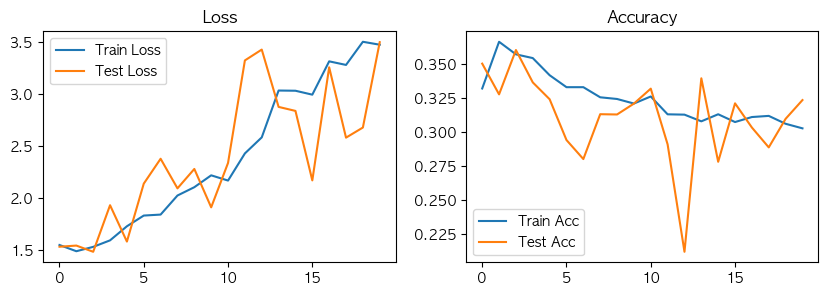


테스트셋 분류 정확도: 0.3236
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


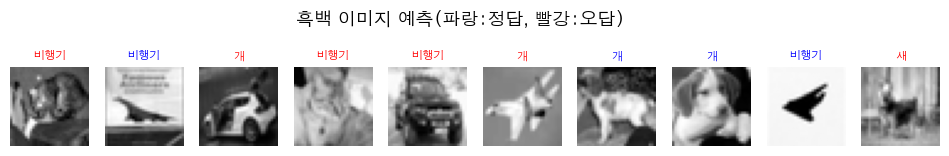

In [2]:


# 1. 클래스 선택 (비행기, 자동차, 새, 고양이, 개)
class_names = ['비행기', '자동차', '새', '고양이', '개']
target_labels = [0, 1, 2, 3, 5]

# 2. 데이터 준비 (훈련/테스트 모두)
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
y_train = y_train.flatten()
y_test = y_test.flatten()

# 선택 클래스 필터
train_idx = np.isin(y_train, target_labels)
test_idx = np.isin(y_test, target_labels)

x_train, y_train = x_train[train_idx], y_train[train_idx]
x_test, y_test = x_test[test_idx], y_test[test_idx]

# 레이블을 0~4로 변환
label_map = {v: i for i, v in enumerate(target_labels)}
y_train = np.array([label_map[y] for y in y_train])
y_test = np.array([label_map[y] for y in y_test])

print("훈련셋 shape:", x_train.shape)
print("테스트셋 shape:", x_test.shape)

# 3. 흑백(Grayscale)로 변환
x_train_gray = tf.image.rgb_to_grayscale(x_train).numpy()  # (N, 32, 32, 1)
x_test_gray = tf.image.rgb_to_grayscale(x_test).numpy()

# 4. 정규화 및 shape 변환 (MLP용, 1D 벡터)
x_train_gray = x_train_gray / 255.0
x_test_gray = x_test_gray / 255.0
x_train_flat = x_train_gray.reshape(-1, 32*32)
x_test_flat = x_test_gray.reshape(-1, 32*32)

# 5. 간단한 분류 모델 정의(MLP)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(32*32,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(len(class_names), activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 6. 모델 학습
history = model.fit(x_train_flat, y_train, epochs=20, batch_size=64,
                    validation_data=(x_test_flat, y_test), verbose=2)

# 7. 학습 곡선 시각화
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend()
plt.title("Loss")

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Test Acc')
plt.legend()
plt.title("Accuracy")
plt.show()

# 8. 테스트셋 정확도 평가
test_loss, test_acc = model.evaluate(x_test_flat, y_test, verbose=0)
print(f"\n테스트셋 분류 정확도: {test_acc:.4f}")

# 9. 예측 결과 일부 시각화 (흑백 이미지+예측)
preds = model.predict(x_test_flat[:10])
plt.figure(figsize=(12,2))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(x_test_gray[i].reshape(32,32), cmap='gray')
    pred_label = class_names[np.argmax(preds[i])]
    true_label = class_names[y_test[i]]
    plt.title(pred_label, fontsize=8)
    plt.axis('off')
    # 정답은 파란, 오답은 빨간색
    if pred_label == true_label:
        plt.gca().set_title(pred_label, color='blue', fontsize=8)
    else:
        plt.gca().set_title(pred_label, color='red', fontsize=8)
plt.suptitle("흑백 이미지 예측(파랑:정답, 빨강:오답)", fontsize=13)
plt.show()
